# APPL Stock Price Prediction Using Different Machine Learning Models and Compare the Performance of the Models

## Logistic Regression

### Import Libraries

In [1]:
# yahoo_finance is used to fetch data
!pip install yfinance

In [2]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

!pip install yfinance
import yfinance as yf
yf.pdr_override()

# MATPLOTLIB & SEABORN FOR GRAPH-PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load data into a Data Frame

In [3]:
# input
symbol = 'AAPL'
start = '2018-12-12'
end = '2022-12-12'

# Read data
dataset = yf.download(symbol,start,end)
# dataset = pd.read_csv("./dataset/AAPL.csv")

[*********************100%***********************]  1 of 1 completed


In [4]:
# View Columns
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-12,42.599998,42.980000,42.255001,42.275002,40.740604,142510800
2018-12-13,42.622501,43.142502,42.387501,42.737499,41.186317,127594400
2018-12-14,42.250000,42.270000,41.320000,41.369999,39.868450,162814800
2018-12-17,41.362499,42.087502,40.682499,40.985001,39.497421,177151600
2018-12-18,41.345001,41.882500,41.097500,41.517502,40.010597,135366000


### Data Preprocessing

In [5]:
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,-1)

In [6]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Buy_Sell
Date,,,,,,,
2018-12-12,42.599998,42.980000,42.255001,42.275002,40.740604,142510800,1
2018-12-13,42.622501,43.142502,42.387501,42.737499,41.186317,127594400,-1
2018-12-14,42.250000,42.270000,41.320000,41.369999,39.868450,162814800,-1
2018-12-17,41.362499,42.087502,40.682499,40.985001,39.497421,177151600,1
2018-12-18,41.345001,41.882500,41.097500,41.517502,40.010597,135366000,-1


In [7]:
# view dataset
dataset

,Open,High,Low,Close,Adj Close,Volume,Buy_Sell
Date,,,,,,,
2018-12-12,42.599998,42.980000,42.255001,42.275002,40.740604,142510800,1
2018-12-13,42.622501,43.142502,42.387501,42.737499,41.186317,127594400,-1
2018-12-14,42.250000,42.270000,41.320000,41.369999,39.868450,162814800,-1
2018-12-17,41.362499,42.087502,40.682499,40.985001,39.497421,177151600,1
2018-12-18,41.345001,41.882500,41.097500,41.517502,40.010597,135366000,-1
...,...,...,...,...,...,...,...
2022-12-05,147.770004,150.919998,145.770004,146.630005,146.406464,68826400,-1
2022-12-06,147.070007,147.300003,141.919998,142.910004,142.692139,64727200,-1
2022-12-07,142.190002,143.369995,140.000000,140.940002,140.725143,69721100,1


### Null value testing and data clearance

In [8]:
# See how many null values in each column

dataset.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Buy_Sell     0
dtype: int64

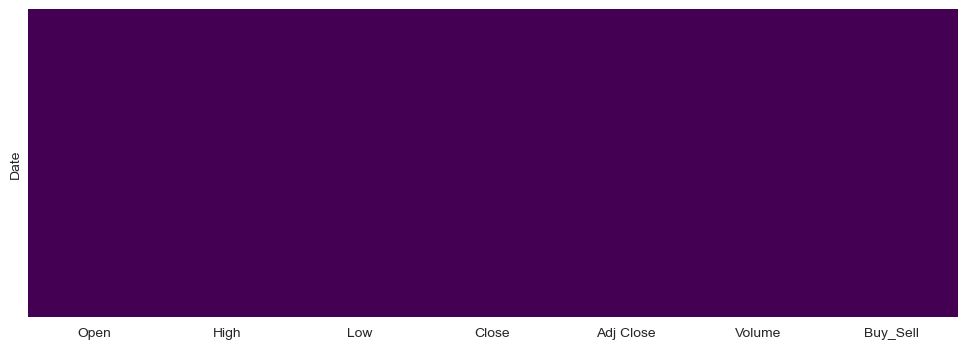

In [9]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("Figure 1: Heatmap for Null Values")

### Analyze the Data

In [10]:
# see number of rows, number of columns
dataset.shape

(1007, 7)

In [11]:
#TOTAL NUMBER OF RECORDS
dataset.size
print("Total number of records = ",dataset.size)

Total number of records =  7049


In [12]:
# see columns names

dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Buy_Sell'], dtype='object')

In [13]:
# See data types of the Columns

dataset.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Buy_Sell       int32
dtype: object

In [14]:
#View Data Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1007 entries, 2018-12-12 to 2022-12-09
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1007 non-null   float64
 1   High       1007 non-null   float64
 2   Low        1007 non-null   float64
 3   Close      1007 non-null   float64
 4   Adj Close  1007 non-null   float64
 5   Volume     1007 non-null   int64  
 6   Buy_Sell   1007 non-null   int32  
dtypes: float64(5), int32(1), int64(1)
memory usage: 59.0 KB


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'Buy_Sell'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

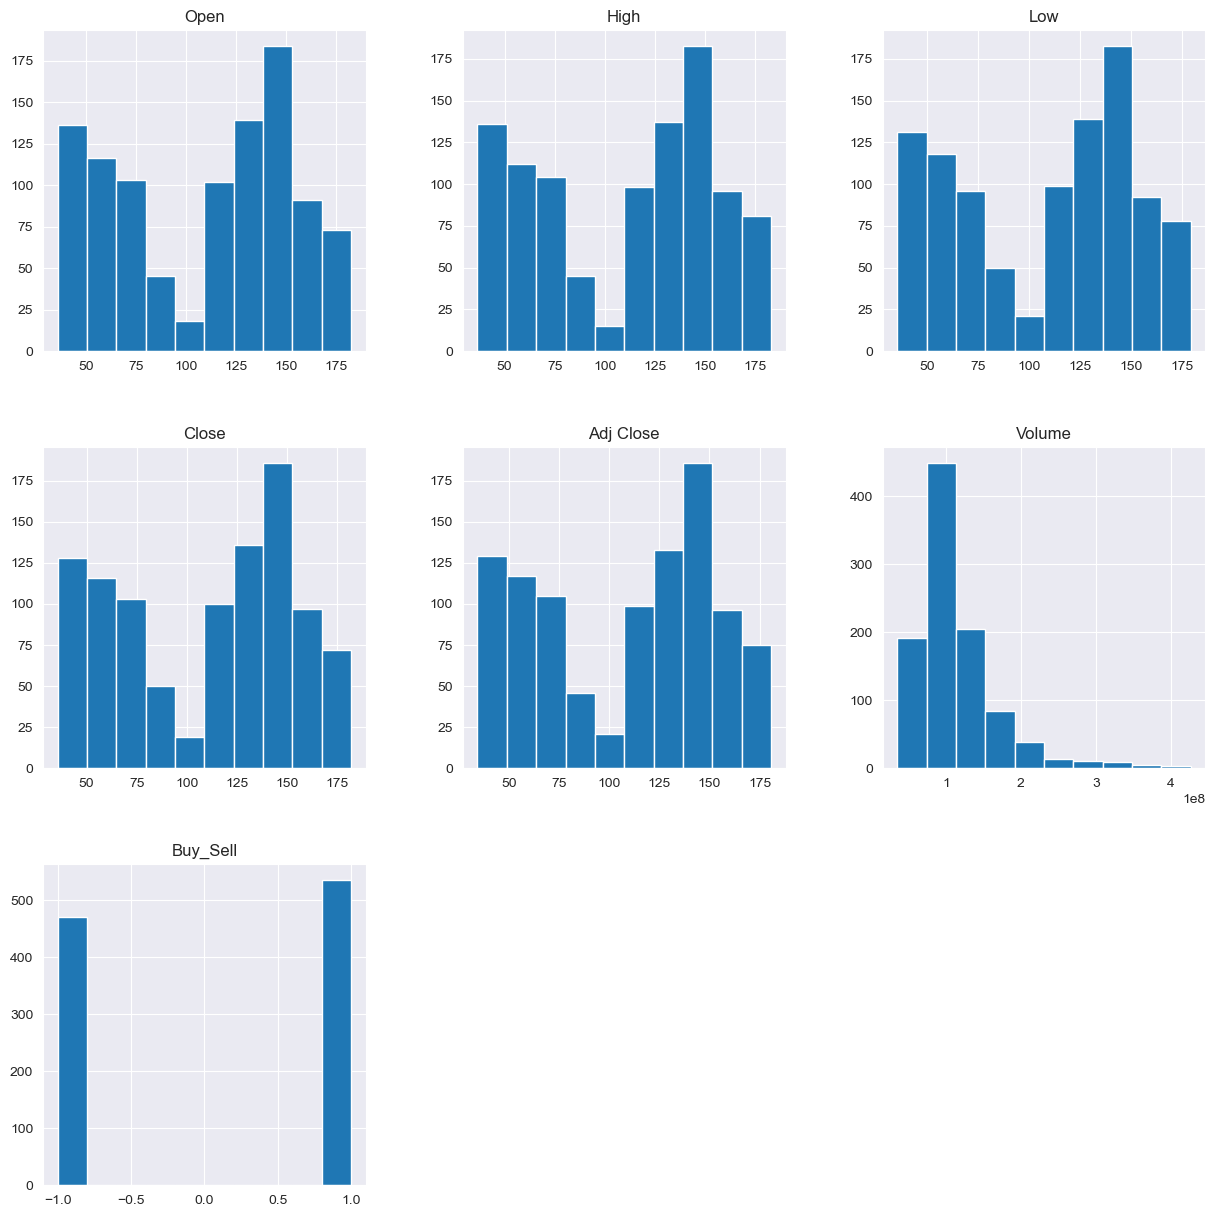

In [15]:
# Histogram per each numerical column

dataset.hist(figsize=(15, 15))

In [16]:
# The statistics per each column

dataset.describe()

,Open,High,Low,Close,Adj Close,Volume,Buy_Sell
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03,1007.000000
mean,109.410792,110.769409,108.123654,109.504849,108.211098,1.134929e+08,0.064548
std,43.876691,44.416329,43.309398,43.874543,44.046247,5.426518e+07,0.998410
min,35.994999,36.430000,35.500000,35.547501,34.257286,3.519590e+07,-1.000000
25%,65.334999,66.098751,64.924999,65.526253,64.096741,7.820055e+07,-1.000000
50%,122.309998,123.699997,120.419998,121.959999,120.509399,9.839060e+07,1.000000
75%,146.994995,148.735001,145.595001,147.049995,146.310471,1.306592e+08,1.000000
max,182.630005,182.940002,179.119995,182.009995,180.683853,4.265100e+08,1.000000


### Define X and Y

In [17]:
dataset['Buy_Sell'] = dataset['Buy_Sell'].astype('int')

In [18]:
# Define X
X = np.asarray(dataset[['Open', 'High', 'Low', 'Adj Close', 'Volume']])
X[0:5]

array([[4.25999985e+01, 4.29799995e+01, 4.22550011e+01, 4.07406044e+01,
        1.42510800e+08],
       [4.26225014e+01, 4.31425018e+01, 4.23875008e+01, 4.11863174e+01,
        1.27594400e+08],
       [4.22500000e+01, 4.22700005e+01, 4.13199997e+01, 3.98684502e+01,
        1.62814800e+08],
       [4.13624992e+01, 4.20875015e+01, 4.06824989e+01, 3.94974213e+01,
        1.77151600e+08],
       [4.13450012e+01, 4.18824997e+01, 4.10974998e+01, 4.00105972e+01,
        1.35366000e+08]])

In [19]:
# Define y
y = np.asarray(dataset['Buy_Sell'])
y[0:5]

array([ 1, -1, -1,  1, -1])

In [20]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.52345106, -1.52698559, -1.52164163, -1.53257142,  0.53500871],
       [-1.52293793, -1.52332516, -1.51858074, -1.52244719,  0.25999233],
       [-1.53143188, -1.54297862, -1.54324124, -1.55238213,  0.90935724],
       [-1.55166909, -1.54708949, -1.55796824, -1.56080994,  1.17368743],
       [-1.55206809, -1.55170725, -1.54838124, -1.54915331,  0.40327873]])

### Split Train data and Test data

In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (755, 5) (755,)
Test set: (252, 5) (252,)


### Dataset Traning and Model Traning

In [22]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR
     

LogisticRegression(C=0.01, solver='liblinear')

### Comparison of Actual Values and Predictions Values

In [23]:
# Predicting the Test set results
yhat = LR.predict(X_test)
yhat

array([-1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,
       -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1,
        1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,
        1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,
        1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1,
        1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1,
        1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1, -1,
        1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1,
        1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1,
        1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,
       -1,  1,  1,  1,  1

In [24]:
# predict_proba is returns of estimates for all classes, ordered by the label of classes. 
# The first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X)
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.52187185, 0.47812815],
       [0.48118107, 0.51881893],
       [0.44314933, 0.55685067],
       [0.51459779, 0.48540221],
       [0.4524004 , 0.5475996 ],
       [0.52476387, 0.47523613],
       [0.44157694, 0.55842306],
       [0.50372752, 0.49627248],
       [0.49492507, 0.50507493],
       [0.46644638, 0.53355362],
       [0.51021861, 0.48978139],
       [0.43407385, 0.56592615],
       [0.49413172, 0.50586828],
       [0.49195442, 0.50804558],
       [0.50383897, 0.49616103],
       [0.50120726, 0.49879274],
       [0.47600511, 0.52399489],
       [0.52115178, 0.47884822],
       [0.4423167 , 0.5576833 ],
       [0.49830467, 0.50169533],
       [0.48691722, 0.51308278],
       [0.46858512, 0.53141488],
       [0.50963307, 0.49036693],
       [0.50898173, 0.49101827],
       [0.48273199, 0.51726801],
       [0.50231346, 0.49768654],
       [0.48979418, 0.51020582],
       [0.47593752, 0.52406248],
       [0.46356365, 0.53643635],
       [0.46348969, 0.53651031],
       [0.

In [25]:
# Making the Confusion Matrix
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.45226130653266333

In [26]:
# Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[90  0]
 [ 0  0]]


### Accuracy and Loss Function Values of the Model

Confusion matrix, without normalization
[[90  0]
 [ 0  0]]


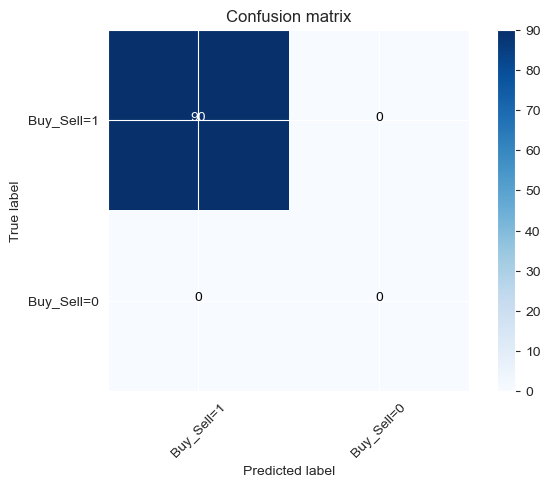

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Buy_Sell=1','Buy_Sell=0'],normalize= False,  title='Confusion matrix')

In [28]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

          -1       0.51      0.48      0.49       111
           1       0.61      0.64      0.62       141

    accuracy                           0.57       252
   macro avg       0.56      0.56      0.56       252
weighted avg       0.56      0.57      0.57       252



In [29]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, yhat))
print("Precision:",metrics.precision_score(y_test, yhat))
print("Recall:",metrics.recall_score(y_test, yhat))

Accuracy: 0.5674603174603174
Precision: 0.6081081081081081
Recall: 0.6382978723404256


In [30]:
# Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6855965442368789

In [31]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.68


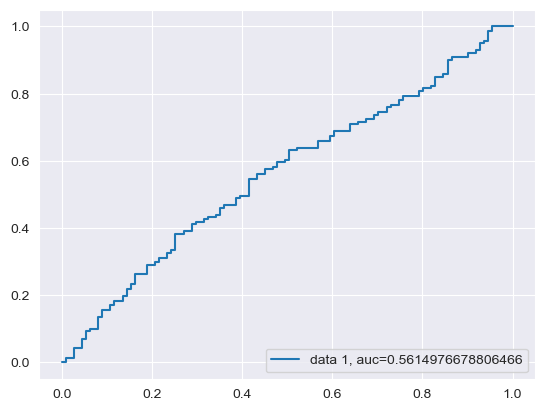

In [32]:
y_pred_proba = LR.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [33]:
print("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.68


In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, yhat))

Accuracy: 0.5674603174603174
